In [61]:
# !pip3 install openpyxl
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

###   Data Exploration

In [12]:
# Loading the Data in Pandas
acquisition_data = pd.read_excel('BB Analyst_ Dataset.xlsx', sheet_name='Acquisition data')
orders_data = pd.read_excel('BB Analyst_ Dataset.xlsx', sheet_name='Orders data')
acquisition_data.head()


,Region,Acquisition Channel,Tier Segment,Acquisition month_dt,New Companies
0,Novaria,Organic,T3,2024-02-01,1
1,Seraphica,Outreach,T4,2024-02-01,1
2,Valoria,Marketing,T4,2024-02-01,3
3,Aquilonia,Marketing,T3,2024-02-01,2
4,Novaria,Outreach,T4,2024-02-01,1


In [18]:
print(acquisition_data.isnull().sum())
print(acquisition_data.describe())

Region                  0
Acquisition Channel     0
Tier Segment            0
Acquisition month_dt    0
New Companies           0
dtype: int64
                Acquisition month_dt  New Companies
count                           1155    1155.000000
mean   2023-01-10 00:27:25.714285568       9.648485
min              2022-01-01 00:00:00       1.000000
25%              2022-07-01 00:00:00       2.000000
50%              2023-01-01 00:00:00       5.000000
75%              2023-08-01 00:00:00      12.000000
max              2024-02-01 00:00:00     158.000000
std                              NaN      13.466477


In [19]:
print(orders_data.isnull().sum())
print(orders_data.describe())
orders_data.head()

Region                 0
Acquisition Channel    0
Segment                0
Order month_dt         0
Active Companies       0
Revenue                0
Orders                 0
dtype: int64
                      Order month_dt  Active Companies       Revenue  \
count                           1756       1756.000000   1756.000000   
mean   2023-02-17 17:00:57.403188992         39.584282   6020.625047   
min              2022-01-01 00:00:00          1.000000      1.039108   
25%              2022-08-01 00:00:00          4.000000    761.502375   
50%              2023-03-01 00:00:00         16.000000   2682.457918   
75%              2023-09-01 00:00:00         49.250000   7707.213576   
max              2024-03-01 00:00:00        490.000000  71013.628128   
std                              NaN         62.271515   8245.028443   

             Orders  
count   1756.000000  
mean    1108.743736  
min        1.000000  
25%      105.000000  
50%      391.000000  
75%     1292.250000  
max    11

,Region,Acquisition Channel,Segment,Order month_dt,Active Companies,Revenue,Orders
0,Novaria,Outreach,T3,2024-03-01,1,4.361266,2
1,Lumina,Marketing,T2,2024-03-01,1,3.201000,1
2,Veridia,Outreach,T1,2024-03-01,4,163.221550,22
3,Veridia,Organic,T3,2024-03-01,3,21.973600,3
4,Veridia,Marketing,T3,2024-03-01,7,59.440000,8


In [38]:
def plot_pie_chart(data, feature):
    feature_counts = data[feature].value_counts()
    colors = sns.color_palette('pastel')[0:len(feature_counts)]
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct
    plt.figure(figsize=(10, 6))
    plt.pie(feature_counts, labels=feature_counts.index, autopct=make_autopct(feature_counts), 
            startangle=140, colors=colors, shadow=True, explode=[0.05]*len(feature_counts))
    plt.title(f'Number of New Companies by {feature}', fontsize=16)
    plt.legend(feature_counts.index, title=feature, bbox_to_anchor=(1, 1))
    plt.show()

def plot_pie_chart_ax(ax, data, feature):
    feature_sum = data.groupby(feature)['New Companies'].sum()
    feature_sum = feature_sum.sort_values(ascending=False)
    colors = sns.color_palette('pastel')[0:len(feature_sum)]
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    ax.pie(feature_sum, labels=feature_sum.index, autopct=make_autopct(feature_sum), 
           startangle=140, colors=colors, shadow=True, explode=[0.05]*len(feature_sum))
    ax.set_title(f'Number of New Companies by {feature}', fontsize=16)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.


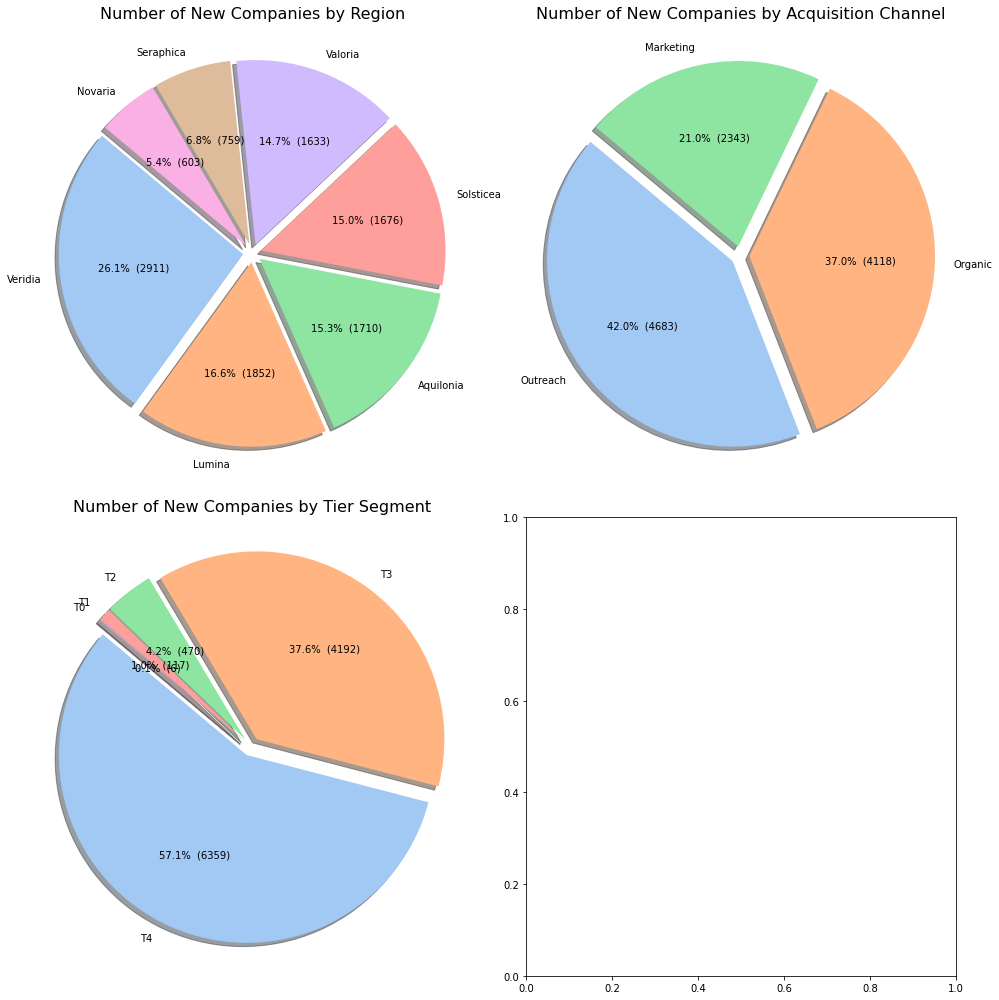

In [42]:
features = ['Region', 'Acquisition Channel', 'Tier Segment']
num_features = len(features)
num_cols = 2
num_rows = (num_features + 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 7))
axes = axes.flatten()

for i, feature in enumerate(features):
    plot_pie_chart_ax(axes[i], acquisition_data, feature)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Order month_dt', ylabel='Revenue'>

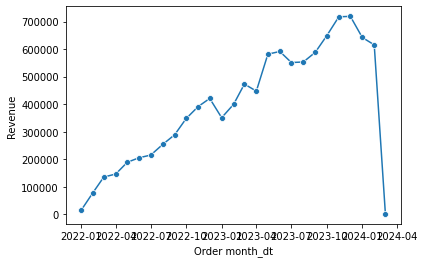

In [49]:
order_monthly = orders_data.groupby('Order month_dt')['Revenue'].sum().reset_index()
order_feature = orders_data.groupby(['Order month_dt', 'segment'])['Revenue'].sum()
sns.lineplot(data=order_monthly, x='Order month_dt', y='Revenue', marker='o')

Index(['Region', 'Acquisition Channel', 'Segment', 'Order month_dt',
       'Active Companies', 'Revenue', 'Orders'],
      dtype='object')


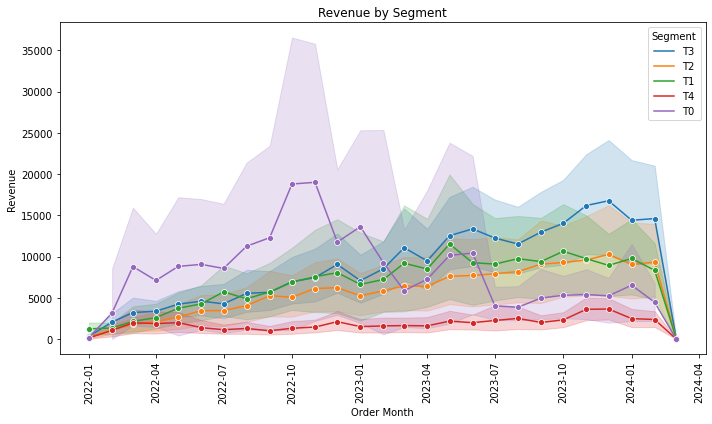

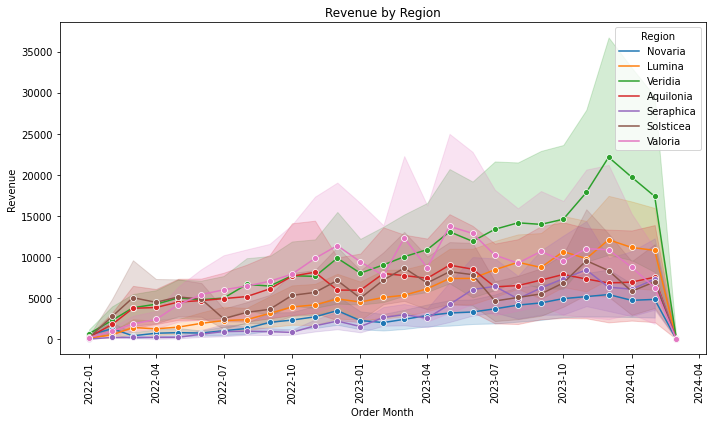

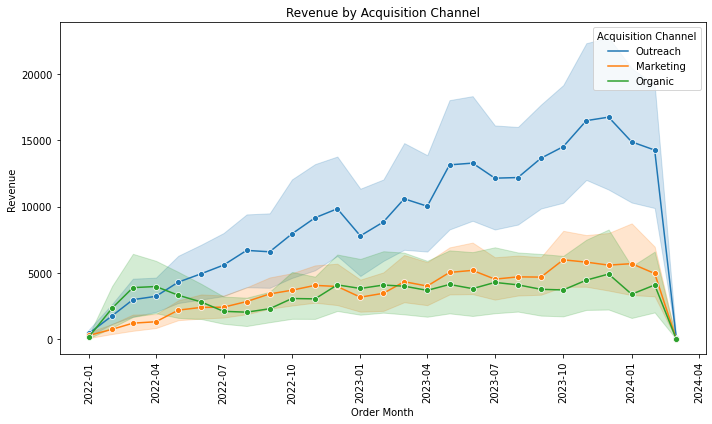

In [62]:
# Revenue 
print(orders_data.columns)
features = ['Segment', 'Region', 'Acquisition Channel']

# Loop through features and create a plot for each
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=orders_data, x='Order month_dt', y='Revenue', hue=feature, marker='o')
    plt.title(f'Revenue by {feature}')
    plt.xlabel('Order Month')
    plt.ylabel('Revenue')
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [32]:

# Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(orders_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Orders Data')
plt.show()

# Merge datasets for combined analysis
merged_data = pd.merge(acquisition_data, orders_data, left_on=['Region', 'Acquisition Month'], right_on=['Region', 'Order Month'], how='inner')
print("\nMerged Data:")
print(merged_data.head())

# Analysis of performance tiers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Segment', y='Revenue')
plt.title('Revenue Distribution by Performance Tier')
plt.show()

# Summary of Findings
summary = """
Summary of Findings:
1. The number of new companies varies significantly by region and acquisition channel.
2. Performance tiers indicate varying levels of revenue generation, with higher tiers generally showing higher revenue.
3. Revenue trends over time show seasonal or periodic fluctuations.
4. Regional analysis reveals certain areas as high revenue-generating regions.
5. Correlation analysis suggests relationships between different variables, providing insights for deeper investigation.

Actionable Insights:
1. Focus marketing and acquisition efforts on regions and channels with historically high new company registrations.
2. Investigate and replicate successful strategies from high-performing regions.
3. Tailor acquisition strategies for different performance tiers to optimize revenue generation.
4. Monitor revenue trends for proactive planning and resource allocation.

These insights will help in making informed decisions and strategic planning for the growth of the Bold business.
"""

print(summary)

KeyError: 'Order Month'

<Figure size 720x432 with 0 Axes>